In [8]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import matplotlib.pyplot as plt

In [2]:
load_dotenv("../.env")

user = os.getenv("PG_USER")
password = os.getenv("PG_PASSWORD")
host = os.getenv("PG_HOST")
port = os.getenv("PG_PORT")
database = os.getenv("PG_DATABASE")

In [3]:
url = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(url)

In [4]:
query = 'SELECT * FROM "Candidates";'

df = pd.read_sql(query, engine)

df.head()

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


In [5]:
df.shape

(50000, 10)

ESto nos indica que el dataset consta de 50000 filas con 10 colunmas 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   First Name                 50000 non-null  object
 1   Last Name                  50000 non-null  object
 2   Email                      50000 non-null  object
 3   Application Date           50000 non-null  object
 4   Country                    50000 non-null  object
 5   YOE                        50000 non-null  int64 
 6   Seniority                  50000 non-null  object
 7   Technology                 50000 non-null  object
 8   Code Challenge Score       50000 non-null  int64 
 9   Technical Interview Score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


Esto nos indica que en los datos no hay valores nulos, y que estamos trabajando con objetos y enteros

In [ ]:

missing_values = df.isnull().sum()
print(missing_values)

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

First Name                   0
Last Name                    0
Email                        0
Application Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code Challenge Score         0
Technical Interview Score    0
dtype: int64
Number of duplicate rows: 0


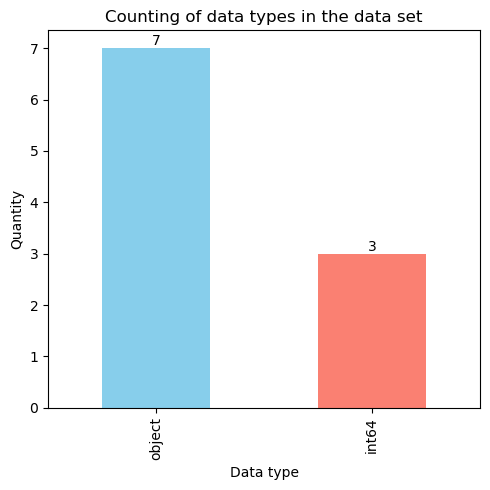

In [9]:
data_types_counts = df.dtypes.value_counts()


colors = ['skyblue', 'salmon']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Data type')
plt.ylabel('Quantity')
plt.title('Counting of data types in the data set')


for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

El DataFrame "candidatos" consta de 7 columnas categorizadas como "objeto" (que representan datos categóricos) y 3 columnas categorizadas como "int64" (que representan datos numéricos).

Ahora, hacemos un gráfico para ver nuestros valores únicos por columna:

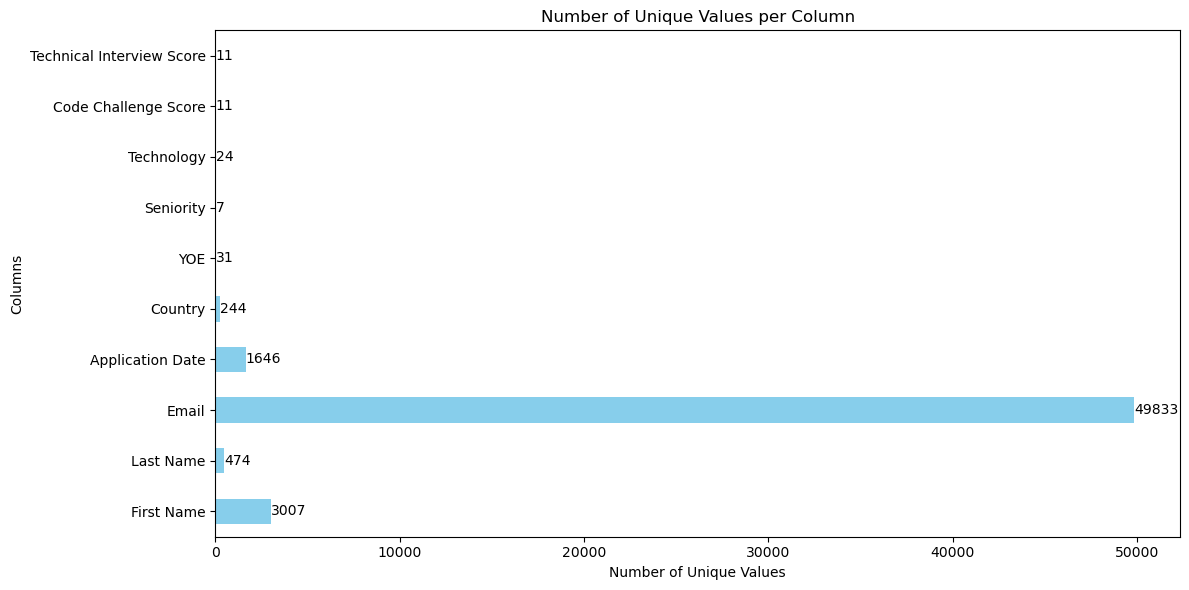

In [10]:
unique_counts = df.nunique()


colors = ['skyblue']

plt.figure(figsize=(12, 6)) 
bar_plot = unique_counts.plot(kind='barh', color=colors)

plt.ylabel('Columns')
plt.xlabel('Number of Unique Values')
plt.title('Number of Unique Values per Column')


for i, value in enumerate(unique_counts):
    plt.text(value, i, str(value), ha='left', va='center')


plt.tight_layout()
plt.show()

examinamos el recuento de valores distintos y observamos casos en los que tanto el nombre como el apellido aparecían repetidamente. En cuanto a los correos electrónicos, aunque no todos son distintos, la mayoría sí lo son. Encontramos candidatos de un total de 244 países, que abarcaban 7 tecnologías; esto es algo raro, ya que hay 195 países en el mundo. Los años de experiencia laboral de los candidatos oscilaban entre 0 y 31, y el aspecto restante se refiere a la puntuación, lo cual es significativo dado que la escala va de 0 a 10.

Veamos ahora el intervalo de fechas de nuestro dataframe

In [13]:
min_date= df['Application Date'].min()

max_date= df['Application Date'].max()


print("The data goes from: "+ str(min_date)+ " to " + str(max_date))

The data goes from: 2018-01-01 to 2022-07-04


Estos datos van desde principios de 2018 hasta el 04 de julio de 2022.

análisis de las fechas que tienen el mayor número de solicitudes y el menor número de solicitudes

In [14]:
df['Application Date'] = pd.to_datetime(df['Application Date'])

applications_by_date = df['Application Date'].dt.date.value_counts().sort_index()

date_with_most_applications = applications_by_date.idxmax()
most_applications = applications_by_date.max()

date_with_least_applications = applications_by_date.idxmin()
least_applications = applications_by_date.min()

print("Date with most applications:", date_with_most_applications, "- Number of applications:", most_applications)
print("Date with least applications:", date_with_least_applications, "- Number of applications:", least_applications)

Date with most applications: 2020-07-07 - Number of applications: 50
Date with least applications: 2022-01-08 - Number of applications: 14



Los datos muestran un notable pico de solicitudes registrado en julio de 2020, alcanzando un total de 50 solicitudes, posiblemente reflejo de un periodo de alta demanda de empleo o de circunstancias favorables en el mercado laboral en ese momento. Por otro lado, el mínimo número de solicitudes en enero de 2022, con sólo 14 solicitudes, sugiere un marcado descenso de la actividad laboral o del interés de los candidatos en ese periodo concreto. Estas fluctuaciones revelan la naturaleza dinámica del mercado laboral y la importancia de tener en cuenta los factores externos que pueden influir en el comportamiento de los demandantes de empleo.

Echemos ahora un vistazo exploratorio a algunas columnas clave para nuestro análisis.

In [18]:
df.head()

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


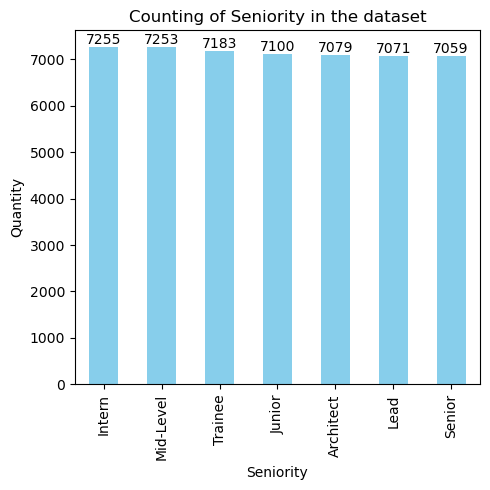

In [22]:
data_types_counts = df.Seniority.value_counts()


colors = ['skyblue']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Seniority')
plt.ylabel('Quantity')
plt.title('Counting of Seniority in the dataset')


for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Como podemos ver, todos los valores se mantienen por encima de 7000, mostrando una consistencia notablemente similar entre ellos. Es importante realizar este análisis, ya que nos proporcionará datos clave para nuestra evaluación final, teniendo en cuenta la analítica de contratado o no.

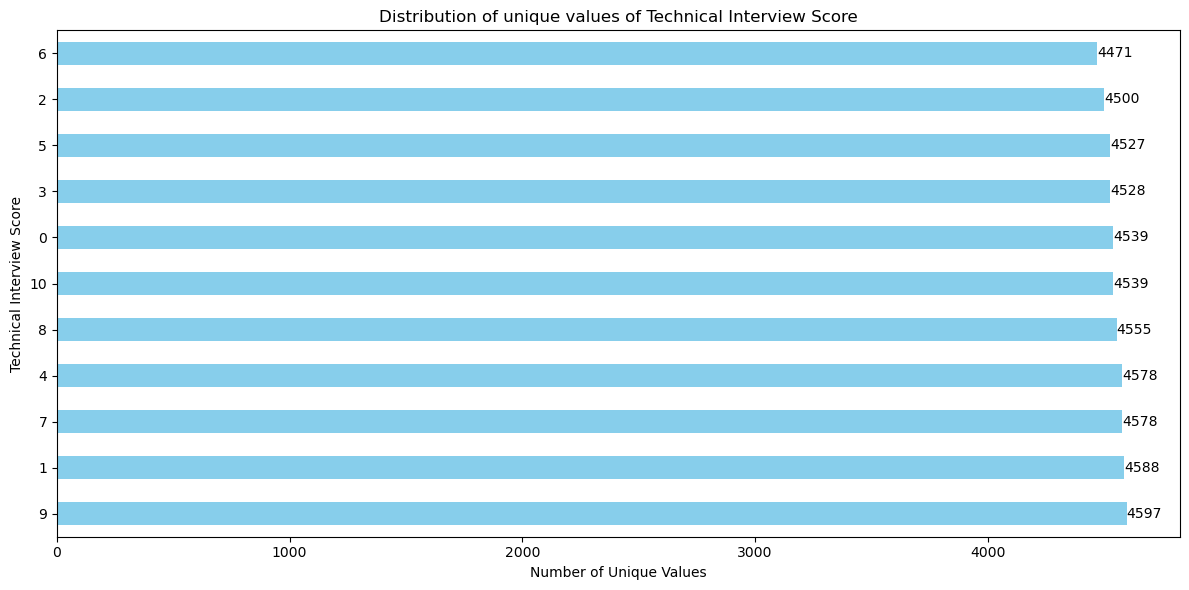

In [23]:
technical_interview_score = df['Technical Interview Score'].value_counts()


colors=['skyblue']

plt.figure(figsize=(12, 6)) 
bar_plot = technical_interview_score.plot(kind='barh', color=colors)

plt.ylabel('Technical Interview Score')
plt.xlabel('Number of Unique Values')
plt.title('Distribution of unique values of Technical Interview Score')


for i, value in enumerate(technical_interview_score):
    plt.text(value, i, str(value), ha='left', va='center')


plt.tight_layout()
plt.show()

Como se observa, los valores se mantienen sistemáticamente por encima de 4000, lo que indica una notable similitud entre los valores, ya que se alinean estrechamente entre sí.Esperemos a ver cómo se comportan con analítica contratada o no.

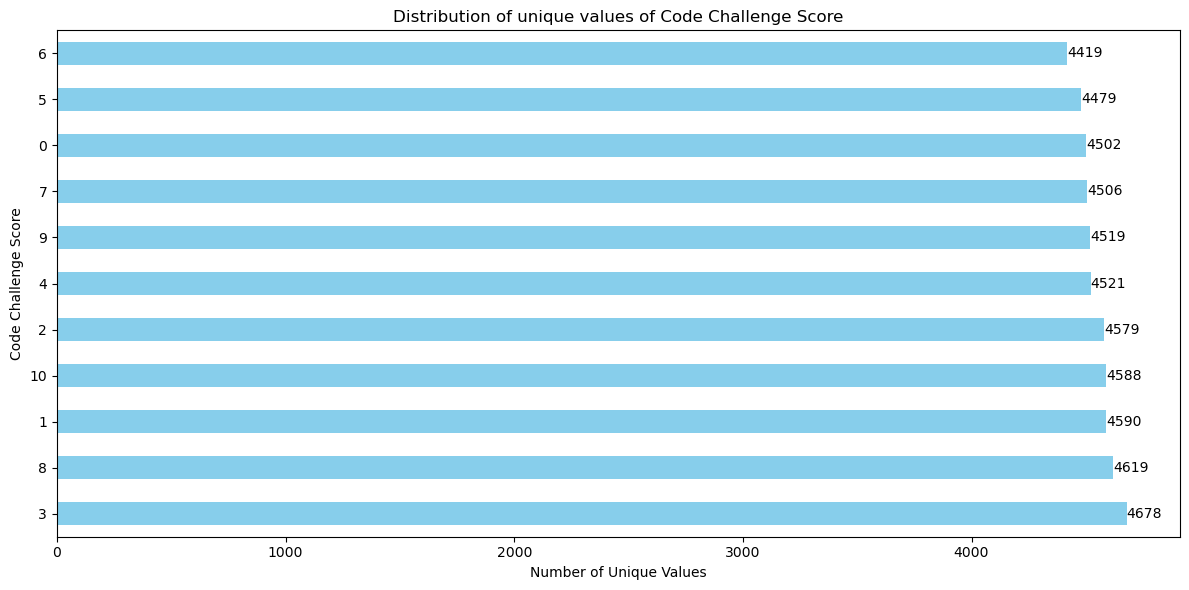

In [24]:
code_challenge_score = df['Code Challenge Score'].value_counts()


colors=['skyblue']

plt.figure(figsize=(12, 6)) 
bar_plot = code_challenge_score.plot(kind='barh', color=colors)

plt.ylabel('Code Challenge Score')
plt.xlabel('Number of Unique Values')
plt.title('Distribution of unique values of Code Challenge Score')


for i, value in enumerate(code_challenge_score):
    plt.text(value, i, str(value), ha='left', va='center')


plt.tight_layout()
plt.show()

Como se ha observado, los valores se mantienen sistemáticamente por encima de 4000, lo que indica una notable similitud entre los valores, ya que se alinean estrechamente entre sí.

Estos dos últimos gráficos son fundamentales para calcular nuestra nueva columna. Debemos ser muy cuidadosos al realizar este procedimiento.